In [1]:
import numpy as np 
import pandas as pd 
import json 
import requests
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge beautifulsoup4 --yes
from bs4 import BeautifulSoup 
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim  

print("Libraries imported.")

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.0       |   py36h9f0ad1d_0         160 KB  conda-forge
    soupsieve-1.9.4            |   py36h9f0ad1d_1          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         218 KB

The following NEW packages will be INSTALLED:

  beautifulsoup4     conda-forge/linux-64::beautifulsoup4-4.9.0-py36h9f0ad1d_0
  soupsieve          conda-forge/linux-64::soupsieve-1.9.4-py36h9f0ad1d_1



beautifulsoup4-4.9.0 | 160 KB    | #################

### Importing the csv data of Paris from my Github account

In [2]:
paris_data=pd.read_csv('https://raw.githubusercontent.com/lgdrin/Coursera_Capstone/master/PARIS%20DATA.csv') #trocar link depois
paris_data.head(20)

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


#### Dropping columns and renaming others for better comprehension

In [3]:
paris_data.drop(['CAR'], axis = 1, inplace = True)
#paris_data.drop(['NSQAR'], axis = 1, inplace = True)
paris_data.drop(['CAR.1'], axis = 1, inplace = True)
paris_data.drop(['CARINSEE'], axis = 1, inplace = True)
paris_data.drop(['NSQCO'], axis = 1, inplace = True)
paris_data.drop(['PERIMETRE'], axis = 1, inplace = True)

paris_data.head()

,NAME,NSQAR,LAR,SURFACE,Geometry_X,Geometry_Y
0,Temple,750000003,3eme Ardt,1170882828,48.862872,2.360001
1,Buttes-Chaumont,750000019,19eme Ardt,6792651129,48.887076,2.384821
2,Observatoire,750000014,14eme Ardt,5614877309,48.829245,2.326542
3,Entrepot,750000010,10eme Ardt,2891739442,48.876130,2.360728
4,Reuilly,750000012,12eme Ardt,16314782637,48.834974,2.421325


In [4]:
paris_data.rename(columns={"NAME": "Borough"}, inplace=True)
paris_data.rename(columns={"LAR": "Neighborhood"}, inplace=True)
paris_data.rename(columns={"NSQAR": "ZIP Code"}, inplace=True)
paris_data.rename(columns={"Geometry_X": "Latitude"}, inplace=True)
paris_data.rename(columns={"Geometry_Y": "Longitude"}, inplace=True)
paris_data.head()

,Borough,ZIP Code,Neighborhood,SURFACE,Latitude,Longitude
0,Temple,750000003,3eme Ardt,1170882828,48.862872,2.360001
1,Buttes-Chaumont,750000019,19eme Ardt,6792651129,48.887076,2.384821
2,Observatoire,750000014,14eme Ardt,5614877309,48.829245,2.326542
3,Entrepot,750000010,10eme Ardt,2891739442,48.876130,2.360728
4,Reuilly,750000012,12eme Ardt,16314782637,48.834974,2.421325


#### Setting the ZIP Codes to their correct forms 

In [5]:
paris_data['ZIP Code']=paris_data['ZIP Code'].apply(str)
paris_data['ZIP Code']=paris_data['ZIP Code'].replace("750000", "75", regex= True)
paris_data['ZIP Code']=paris_data['ZIP Code'].apply(int)

In [6]:
paris_data.head()

,Borough,ZIP Code,Neighborhood,SURFACE,Latitude,Longitude
0,Temple,75003,3eme Ardt,1170882828,48.862872,2.360001
1,Buttes-Chaumont,75019,19eme Ardt,6792651129,48.887076,2.384821
2,Observatoire,75014,14eme Ardt,5614877309,48.829245,2.326542
3,Entrepot,75010,10eme Ardt,2891739442,48.876130,2.360728
4,Reuilly,75012,12eme Ardt,16314782637,48.834974,2.421325


In [7]:
paris_data.dtypes

Borough          object
ZIP Code          int64
Neighborhood     object
SURFACE           int64
Latitude        float64
Longitude       float64
dtype: object

#### As imagined before, the ZIP Codes have a moderate to strong positive correlation with the surface of a neighborhoods

In [8]:
paris_data['ZIP Code'].corr(paris_data['SURFACE'])

0.5938289290939357

#### Sorting Values by ascencding order of ZIP Code. Neighborhoods in Paris have ZIP Codes in the form of 750XX, being XX the number of the arrondissement, from 1 to 20. The reason will be explained in a moment.

In [9]:
paris_data=paris_data.sort_values(by=["ZIP Code"])


In [10]:
paris_data.head()

,Borough,ZIP Code,Neighborhood,SURFACE,Latitude,Longitude
11,Louvre,75001,1er Ardt,1824612860,48.862563,2.336443
7,Bourse,75002,2eme Ardt,991153745,48.868279,2.342803
0,Temple,75003,3eme Ardt,1170882828,48.862872,2.360001
8,Hotel-de-Ville,75004,4eme Ardt,1600585632,48.854341,2.357630
12,Pantheon,75005,5eme Ardt,2539374623,48.844443,2.350715


#### Setting my foursquare API Data, to be changed for privacy reasons

In [11]:
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
VERSION = '20200401' # 1st of April, 2020 version


### Define a function to find venues around the center of each of the neighborhoods.

This step was done three times, varying the radius on each time, in order to cover a big surface while keeping it easy to treat duplicates. Duplicates are venues that will be found within the radius of two different neighborhoods.
The point of this exercise is that, by doing only once with a small radius, most of the city was not covered, as seen in our report, and after doing once with a big radius, the first problem minimized, but the number of duplicates gets incredebly high.

After some thoughts, the criteria I found for removing duplicates without compromising the results will be keeping the results found: 1) in the smallest radius, since finding a venue less than 500 meters far from the center point of a neighborhood is more significant than being 1000 meters far from another; 2) in the most peripheral neighborhood, if found within the same radius.

For these reasons, we are going to create a dataframe with results from 3 different radius, in descending order, with ZIP Codes in ascending order in each of the results.


In [12]:
def getNearbyVenues(zipcodes, names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for zipc, name, lat, lng in zip(zipcodes, names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            zipc,
            name, 
            lat, 
            lng,
            v['venue']['id'],
            v['venue']['name'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['ZIP Code',
                'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',
                'Id',
                  'Venue',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [58]:
paris_venues = getNearbyVenues(zipcodes = paris_data['ZIP Code'],
                                names=paris_data['Neighborhood'],
                                latitudes=paris_data['Latitude'],
                                longitudes=paris_data['Longitude'],
                                )

1er Ardt
2eme Ardt
3eme Ardt
4eme Ardt
5eme Ardt
6eme Ardt
7eme Ardt
8eme Ardt
9eme Ardt
10eme Ardt
11eme Ardt
12eme Ardt
13eme Ardt
14eme Ardt
15eme Ardt
16eme Ardt
17eme Ardt
18eme Ardt
19eme Ardt
20eme Ardt


In [59]:
paris_venues.head()

,ZIP Code,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,75001,1er Ardt,48.862563,2.336443,4adcda10f964a520af3521e3,Musée du Louvre,48.860847,2.336440,Art Museum
1,75001,1er Ardt,48.862563,2.336443,4adcda09f964a520ed3321e3,Palais Royal,48.863236,2.337127,Historic Site
2,75001,1er Ardt,48.862563,2.336443,4b48b4b0f964a5207c5326e3,Comédie-Française,48.863088,2.336612,Theater
3,75001,1er Ardt,48.862563,2.336443,571fe799498ef36a9fd63f1a,La Clef Louvre Paris,48.863977,2.336140,Hotel
4,75001,1er Ardt,48.862563,2.336443,5072efe7e4b0c34b5146e7fd,Cour Napoléon,48.861172,2.335088,Plaza


In [60]:
paris_venues.shape

(1239, 9)

In [62]:
paris_venues.to_csv('paris_restaurants7.csv')

I have created 3 paris_restaurants files, with 800, 1000 and 500 radius in files ending by 5, 6 and 7, respectively. The three will be used to create a new dataframe where remove duplicates are going to be removed by the criteria adopted.

In [11]:
frames = [pd.read_csv('paris_restaurants6.csv'), pd.read_csv('paris_restaurants5.csv'),pd.read_csv('paris_restaurants7.csv')]

#### The three csv files will me concatenated and treated for removing duplicates

In [12]:
paris_venues_merged= pd.concat(frames)

In [13]:
paris_venues_merged.shape

(4901, 10)

In [14]:
paris_venues_merged.head()

,Unnamed: 0,ZIP Code,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,75001,1er Ardt,48.862563,2.336443,4adcda10f964a520af3521e3,Musée du Louvre,48.860847,2.336440,Art Museum
1,1,75001,1er Ardt,48.862563,2.336443,4adcda09f964a520ed3321e3,Palais Royal,48.863236,2.337127,Historic Site
2,2,75001,1er Ardt,48.862563,2.336443,4b48b4b0f964a5207c5326e3,Comédie-Française,48.863088,2.336612,Theater
3,3,75001,1er Ardt,48.862563,2.336443,4f6dabf5003944083fe0002e,Vestige de la Forteresse du Louvre,48.861577,2.333508,Historic Site
4,4,75001,1er Ardt,48.862563,2.336443,571fe799498ef36a9fd63f1a,La Clef Louvre Paris,48.863977,2.336140,Hotel


In [15]:
paris_venues_merged.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [16]:
paris_venues_merged.head()

,ZIP Code,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,75001,1er Ardt,48.862563,2.336443,4adcda10f964a520af3521e3,Musée du Louvre,48.860847,2.336440,Art Museum
1,75001,1er Ardt,48.862563,2.336443,4adcda09f964a520ed3321e3,Palais Royal,48.863236,2.337127,Historic Site
2,75001,1er Ardt,48.862563,2.336443,4b48b4b0f964a5207c5326e3,Comédie-Française,48.863088,2.336612,Theater
3,75001,1er Ardt,48.862563,2.336443,4f6dabf5003944083fe0002e,Vestige de la Forteresse du Louvre,48.861577,2.333508,Historic Site
4,75001,1er Ardt,48.862563,2.336443,571fe799498ef36a9fd63f1a,La Clef Louvre Paris,48.863977,2.336140,Hotel


### In order to treat duplicates, I decided that: 
#### 1) the smaller the radius, the higher its priority. Since venues in bigger radius tend to be part of multiple neighborhoods, by prioritizing the smaller radius, we tend to have a more accurate decision of neighborhood;
#### 2) Observing the shape of paris, the bigger the number of the neighborhood, the bigger its surface.

### by observing these rules, we are keeping the last appearance of the duplicates to be found

In [17]:
paris_venues_merged.drop_duplicates(subset='Id', keep="last", inplace = True)

In [18]:
paris_venues_merged.shape

(2498, 9)

#### After trying three different radius, going from 500 to 1000, let's check if the map has covered most of the city

In [19]:
!pip install folium
import folium

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 91 kB 2.9 MB/s eta 0:00:011


In [20]:
map_clusters = folium.Map(location=[48.863, 2.363], zoom_start=12)

# add markers to the map
markers_colors = []
for lat, lon, poi in zip(paris_venues_merged['Venue Latitude'], paris_venues_merged['Venue Longitude'], paris_venues_merged['Neighborhood']):
    folium.CircleMarker(
        [lat, lon],
        radius= 2,
        color= 'blue',
        fill=True,
        fill_color=222222,
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

#### Even though it has not covered every single corner of the city, the map is a good representation of the venues of the city and it is strongly representative mainly for the central neighborhoods.

#### Sanity check for the drop duplicates function

In [21]:
venues_duplicates = paris_venues_merged['Id'].value_counts().reset_index()
venues_duplicates.columns = ['Id', 'count']

In [22]:
venues_duplicates.head()

,Id,count
0,5185390a498ea00e8cc1f3d0,1
1,4bde7569ffdec92829cae8a1,1
2,4adcda13f964a520ae3621e3,1
3,4c08df87009a0f4741b7e6bf,1
4,5add2fe77918710912949e96,1


#### Now that we are sure there are no duplicates left, let's check what are the most common types of venues in Paris. Our intention is to look for restaurants and bars.

In [23]:
venues_classification = paris_venues_merged['Venue Category'].value_counts().reset_index()
venues_classification.columns = ['Category', 'count']

In [24]:
venues_classification.head(35)

,Category,count
0,French Restaurant,354
1,Hotel,169
2,Italian Restaurant,104
3,Bar,82
4,Bakery,76
5,Japanese Restaurant,69
6,Bistro,65
7,Plaza,62
8,Café,54
9,Coffee Shop,52


After checking out the 35 most common types of venues, I've chosen 'French Restaurant','Italian Restaurant', 'Japanese Restaurant', 'Bistro', 'Wine Bar','Coffee Shop','Café','Cocktail Bar','Bar','Vietnamese Restaurant','Asian Restaurant', 'Thai Restaurant', 'Creperie' and 'Chinese Restaurant' that may arguably be divided into French, Asian, Italian and Bar/Café/Bistro.

In [25]:
paris_restaurants_bars = paris_venues_merged.loc[paris_venues_merged['Venue Category'].isin(['French Restaurant','Italian Restaurant', 'Japanese Restaurant', 'Bistro', 'Wine Bar','Coffee Shop','Café','Cocktail Bar','Bar','Vietnamese Restaurant','Asian Restaurant', 'Thai Restaurant', 'Creperie', 'Chinese Restaurant' ])]


In [26]:
paris_restaurants_bars.head()

,ZIP Code,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Id,Venue,Venue Latitude,Venue Longitude,Venue Category
94,75001,1er Ardt,48.862563,2.336443,4b549414f964a520e4c027e3,Carré des Feuillants,48.866230,2.328729,French Restaurant
181,75002,2eme Ardt,48.868279,2.342803,56c39299498e0190d29569ef,La Maison du Saké,48.864521,2.349226,Japanese Restaurant
186,75002,2eme Ardt,48.868279,2.342803,4b3f9075f964a5202aa925e3,Tir-Bouchon,48.864648,2.348728,French Restaurant
196,75002,2eme Ardt,48.868279,2.342803,51365bc4e4b0d6158f40f8cc,La Régalade Conservatoire,48.873178,2.346732,French Restaurant
291,75003,3eme Ardt,48.862872,2.360001,4b894a17f964a520de2832e3,Ma Cave Fleury,48.865505,2.350544,Wine Bar


In [27]:
paris_restaurants_bars.shape

(989, 9)

#### Let's check how the map now looks like

In [28]:
map_clusters = folium.Map(location=[48.863, 2.363], zoom_start=12)

# add markers to the map
markers_colors = []
for lat, lon, poi in zip(paris_restaurants_bars['Venue Latitude'], paris_restaurants_bars['Venue Longitude'], paris_restaurants_bars['Neighborhood']):
    folium.CircleMarker(
        [lat, lon],
        radius= 2,
        color= 'blue',
        fill=True,
        fill_color=222222,
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

#### Quick check of the neighborhoods with the most restaurants and bars in this sample

NameError: name 'plt' is not defined

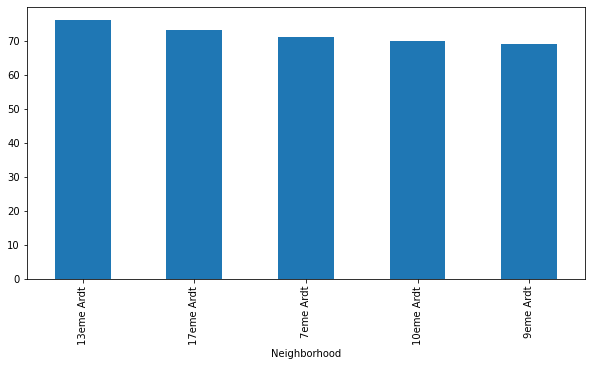

In [29]:
NOofNeigh = 5 # top number for graphing all the same past 6
paris_restaurants_bars.groupby('Neighborhood')['Id'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5))
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Restaurants & Bars', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

#### Saving the dataframe in a csv file

In [19]:
paris_restaurants_bars.to_csv('paris_restaurants_bars2.csv')

####  Now it's time to check for likes, ratigns and tips of the restaurants we have filtered from the list. 
#### Since the foursquare API has a daily limit of searches, the dataframe had to be separated into two csv files, as the quota exceeded. The ones that were able to retrieve a result stayed in csv 1, while the remaining were saved on csv 2, shown in the lines below

In [20]:
paris_restaurants_bars2 = pd.read_csv('paris_restaurants_bars2.csv')

In [28]:
paris_restaurants_bars2.shape

(106, 10)

In [29]:
def get_venue_details(venue_id):
    venue_details = []
    
    for ven in venue_id:
    #url to fetch data from foursquare api
    
        url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
                ven,
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION)
        # get all the data
        results = requests.get(url).json()
        print(results)
        venue_data = results["response"]
   
        try:
            venue_id=venue_data['venue']['id']
            venue_name=venue_data['venue']['name']
            venue_likes=venue_data['venue']['likes']['count']
            venue_rating=venue_data['venue']['rating']
            venue_tips=venue_data['venue']['tips']['count']
            venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
        except KeyError:
            pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [30]:
venues_rating = get_venue_details(venue_id=paris_restaurants_bars2['Id'])

{'meta': {'code': 200, 'requestId': '5ea7139098205d7478b7caba'}, 'response': {'venue': {'id': '599b323f2bf9a935d433a654', 'name': 'Gioco', 'contact': {'phone': '+33140606565', 'formattedPhone': '+33 1 40 60 65 65', 'facebook': '155763274971249', 'facebookName': 'GIOCO'}, 'location': {'address': '2 rue Mademoiselle', 'lat': 48.84351331449931, 'lng': 2.293793594723303, 'labeledLatLngs': [{'label': 'display', 'lat': 48.84351331449931, 'lng': 2.293793594723303}], 'postalCode': '75015', 'cc': 'FR', 'city': 'Paris', 'state': 'Île-de-France', 'country': 'France', 'formattedAddress': ['2 rue Mademoiselle', '75015 Paris', 'France']}, 'canonicalUrl': 'https://foursquare.com/v/gioco/599b323f2bf9a935d433a654', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount

In [31]:
venues_rating.shape

(97, 5)

In [32]:
venues_rating.to_csv('venues_rating2.csv')

#### Time to merge the two files and see the results

In [43]:
frames2 = [pd.read_csv('venues_rating1.csv'),pd.read_csv('venues_rating2.csv')]

In [44]:
venues_rating3 = pd.concat(frames2)

In [45]:
venues_rating3.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [46]:
venues_rating3.head()

,ID,Name,Likes,Rating,Tips
0,4b549414f964a520e4c027e3,Carré des Feuillants,27,8.5,12
1,56c39299498e0190d29569ef,La Maison du Saké,36,8.9,10
2,4b3f9075f964a5202aa925e3,Tir-Bouchon,71,8.4,30
3,51365bc4e4b0d6158f40f8cc,La Régalade Conservatoire,74,8.3,23
4,4b894a17f964a520de2832e3,Ma Cave Fleury,25,8.9,14


In [47]:
venues_rating3.shape

(616, 5)

In [42]:
venues_rating3.rename(columns={"ID": "Id"}, inplace=True)

#### 5 Most Popular Restaurants in Foursquare

In [48]:
venues_rating3.sort_values("Likes", ascending = False, inplace= True)
print ('The most popular restaurant/bar is ' + venues_rating3['Name'].iloc[0])

venues_rating3.head()

The most popular restaurant/bar is Café de Flore


,ID,Name,Likes,Rating,Tips
199,4adcda04f964a520323221e3,Café de Flore,2141,8.2,558
271,4af31753f964a52092ea21e3,Le Comptoir Général,1177,8.7,283
224,4ce7bb33baa6a1cdd369296c,Coutume Café,687,8.2,288
42,4b7728aef964a5206c832ee3,Point Éphémère,660,8.6,111
205,4b22eca6f964a5206c5024e3,Prescription Cocktail Club,590,8.9,197


#### 5 Best Ratings

In [49]:
venues_rating3.sort_values("Rating", ascending = False, inplace= True)
print ('The best restaurant/bar according to users is ' + venues_rating3['Name'].iloc[0])
venues_rating3.head()

The best restaurant/bar according to users is La Cave de Septime


,ID,Name,Likes,Rating,Tips
290,50edcbb9e4b0f4e820906b4e,La Cave de Septime,138,9.5,29
277,5415ae4f498e9aee38f6a39e,CopperBay,124,9.3,31
57,50a3836fe4b08f00ef2d3f44,Bistrotters,173,9.2,78
98,4c113790ce57c928a42383d2,Il était une Oie dans le Sud-Ouest,32,9.2,14
184,50d5be47e4b0fb6ff8363c5f,Bistro du Périgord,47,9.2,25


In [50]:
venues_rating3.rename(columns={"ID": "Id"}, inplace=True)

In [57]:
neighborhood_stats = pd.merge(paris_venues_merged,venues_rating3, on='Id')
neighborhood_stats= neighborhood_stats[['ZIP Code','Id','Name','Neighborhood','Venue Latitude','Venue Longitude','Rating', 'Likes']]
neighborhood_stats

,ZIP Code,Id,Name,Neighborhood,Venue Latitude,Venue Longitude,Rating,Likes
0,75001,4b549414f964a520e4c027e3,Carré des Feuillants,1er Ardt,48.866230,2.328729,8.5,27
1,75002,56c39299498e0190d29569ef,La Maison du Saké,2eme Ardt,48.864521,2.349226,8.9,36
2,75002,4b3f9075f964a5202aa925e3,Tir-Bouchon,2eme Ardt,48.864648,2.348728,8.4,71
3,75002,51365bc4e4b0d6158f40f8cc,La Régalade Conservatoire,2eme Ardt,48.873178,2.346732,8.3,74
4,75003,4b894a17f964a520de2832e3,Ma Cave Fleury,3eme Ardt,48.865505,2.350544,8.9,25
...,...,...,...,...,...,...,...,...
611,75020,4bd579c87b1876b05ebd8a86,Bar de la Place Edith Piaf,20eme Ardt,48.865485,2.405366,6.0,5
612,75020,4d616b6ab6b9a1cd9e188751,Gambetta Club,20eme Ardt,48.859639,2.403017,5.9,10
613,75020,4b8f9a6cf964a520a85933e3,Bistrot du Métro,20eme Ardt,48.865081,2.398461,5.5,14
614,75020,4ba0c495f964a520567c37e3,Café Martin,20eme Ardt,48.864968,2.395234,5.9,30


In [58]:
neighborhood_stats.shape

(616, 8)

#### Now let's find out the neighborhood with the highest average rating of restaurants and bars

In [59]:
average_ratings = pd.pivot_table(neighborhood_stats, values=['Rating'], index=['ZIP Code', 'Neighborhood'],
                    aggfunc={'Rating': np.mean})

average_ratings.sort_values(by=['Rating'], ascending = False, inplace = True)
average_ratings.head(21)

,,Rating
ZIP Code,Neighborhood,
75003,3eme Ardt,8.435000
75009,9eme Ardt,8.363333
75004,4eme Ardt,8.347059
75011,11eme Ardt,8.345946
75002,2eme Ardt,8.341176
75001,1er Ardt,8.335000
75010,10eme Ardt,8.332353
75005,5eme Ardt,8.307692
75006,6eme Ardt,8.227500


#### It seems that  the 12ème and the 20ème are not the best places to get into a random restaurant.

#### Now let's classify restaurants into four categories: French, Asian, Italian and Cafés and Bars

In [60]:
paris_classifier = paris_restaurants_bars
 
def classifier(row):
        if row["Venue Category"] == 'French Restaurant' or row["Venue Category"] == 'Creperie': # I decided to include creperies in french category. It makes sense to me.
                 return "French Restaurants"
        elif row["Venue Category"] == 'Japanese Restaurant' or row["Venue Category"] == 'Vietnamese Restaurant' or row["Venue Category"] =='Thai Restaurant' or row["Venue Category"] == 'Asian Restaurant' or row["Venue Category"] == 'Chinese Restaurant':
                 return "Asian Restaurants"
        elif row["Venue Category"] == 'Italian Restaurant':
                return "Italian Restaurants"
        else:
                 return "Cafés and Bars" #and bistros too
    
paris_classifier["Classification"] = paris_classifier.apply(classifier, axis=1)

paris_classifier

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,ZIP Code,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Id,Venue,Venue Latitude,Venue Longitude,Venue Category,Classification
94,75001,1er Ardt,48.862563,2.336443,4b549414f964a520e4c027e3,Carré des Feuillants,48.866230,2.328729,French Restaurant,French Restaurants
181,75002,2eme Ardt,48.868279,2.342803,56c39299498e0190d29569ef,La Maison du Saké,48.864521,2.349226,Japanese Restaurant,Asian Restaurants
186,75002,2eme Ardt,48.868279,2.342803,4b3f9075f964a5202aa925e3,Tir-Bouchon,48.864648,2.348728,French Restaurant,French Restaurants
196,75002,2eme Ardt,48.868279,2.342803,51365bc4e4b0d6158f40f8cc,La Régalade Conservatoire,48.873178,2.346732,French Restaurant,French Restaurants
291,75003,3eme Ardt,48.862872,2.360001,4b894a17f964a520de2832e3,Ma Cave Fleury,48.865505,2.350544,Wine Bar,Cafés and Bars
...,...,...,...,...,...,...,...,...,...,...
1223,75020,20eme Ardt,48.863461,2.401188,4d616b6ab6b9a1cd9e188751,Gambetta Club,48.859639,2.403017,Bar,Cafés and Bars
1226,75020,20eme Ardt,48.863461,2.401188,4b8f9a6cf964a520a85933e3,Bistrot du Métro,48.865081,2.398461,Bistro,Cafés and Bars
1228,75020,20eme Ardt,48.863461,2.401188,4ba0c495f964a520567c37e3,Café Martin,48.864968,2.395234,Café,Cafés and Bars
1233,75020,20eme Ardt,48.863461,2.401188,4bd603b45631c9b6e126a530,Il Pinocchio,48.867500,2.400757,Italian Restaurant,Italian Restaurants


#### Doing one hot encoding for finding the most common category of restaurant in the neighborhood.

In [61]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_classifier[['Classification']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_classifier['Neighborhood']
paris_onehot['ZIP Code'] = paris_classifier['ZIP Code'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.shape

(989, 6)

In [62]:
paris_onehot.head()

,ZIP Code,Asian Restaurants,Cafés and Bars,French Restaurants,Italian Restaurants,Neighborhood
94,75001,0,0,1,0,1er Ardt
181,75002,1,0,0,0,2eme Ardt
186,75002,0,0,1,0,2eme Ardt
196,75002,0,0,1,0,2eme Ardt
291,75003,0,1,0,0,3eme Ardt


In [63]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped.head()

,Neighborhood,ZIP Code,Asian Restaurants,Cafés and Bars,French Restaurants,Italian Restaurants
0,10eme Ardt,75010,0.185714,0.442857,0.300000,0.071429
1,11eme Ardt,75011,0.070175,0.596491,0.263158,0.070175
2,12eme Ardt,75012,0.166667,0.333333,0.333333,0.166667
3,13eme Ardt,75013,0.776316,0.065789,0.131579,0.026316
4,14eme Ardt,75014,0.163636,0.254545,0.454545,0.127273


In [64]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [65]:
num_top_venues = 3 #show the top 5 five venues per neighborhood

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['ZIP Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1)) #not useful since we have 3 classifications only

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['ZIP Code'] = paris_grouped['ZIP Code']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_sorted=neighborhoods_venues_sorted.head(21)

In [66]:
paris_sorted.head(21)

,ZIP Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,75010,Cafés and Bars,French Restaurants,Asian Restaurants
1,75011,Cafés and Bars,French Restaurants,Italian Restaurants
2,75012,French Restaurants,Cafés and Bars,Italian Restaurants
3,75013,Asian Restaurants,French Restaurants,Cafés and Bars
4,75014,French Restaurants,Cafés and Bars,Asian Restaurants
5,75015,French Restaurants,Cafés and Bars,Italian Restaurants
6,75016,French Restaurants,Italian Restaurants,Asian Restaurants
7,75017,French Restaurants,Italian Restaurants,Cafés and Bars
8,75018,Cafés and Bars,French Restaurants,Asian Restaurants
9,75019,Cafés and Bars,French Restaurants,Asian Restaurants
